In [2]:
import pandas as pd                     #OKK
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Random Forest\\glass.xlsx",sheet_name = 'glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: xlabel='Type', ylabel='count'>

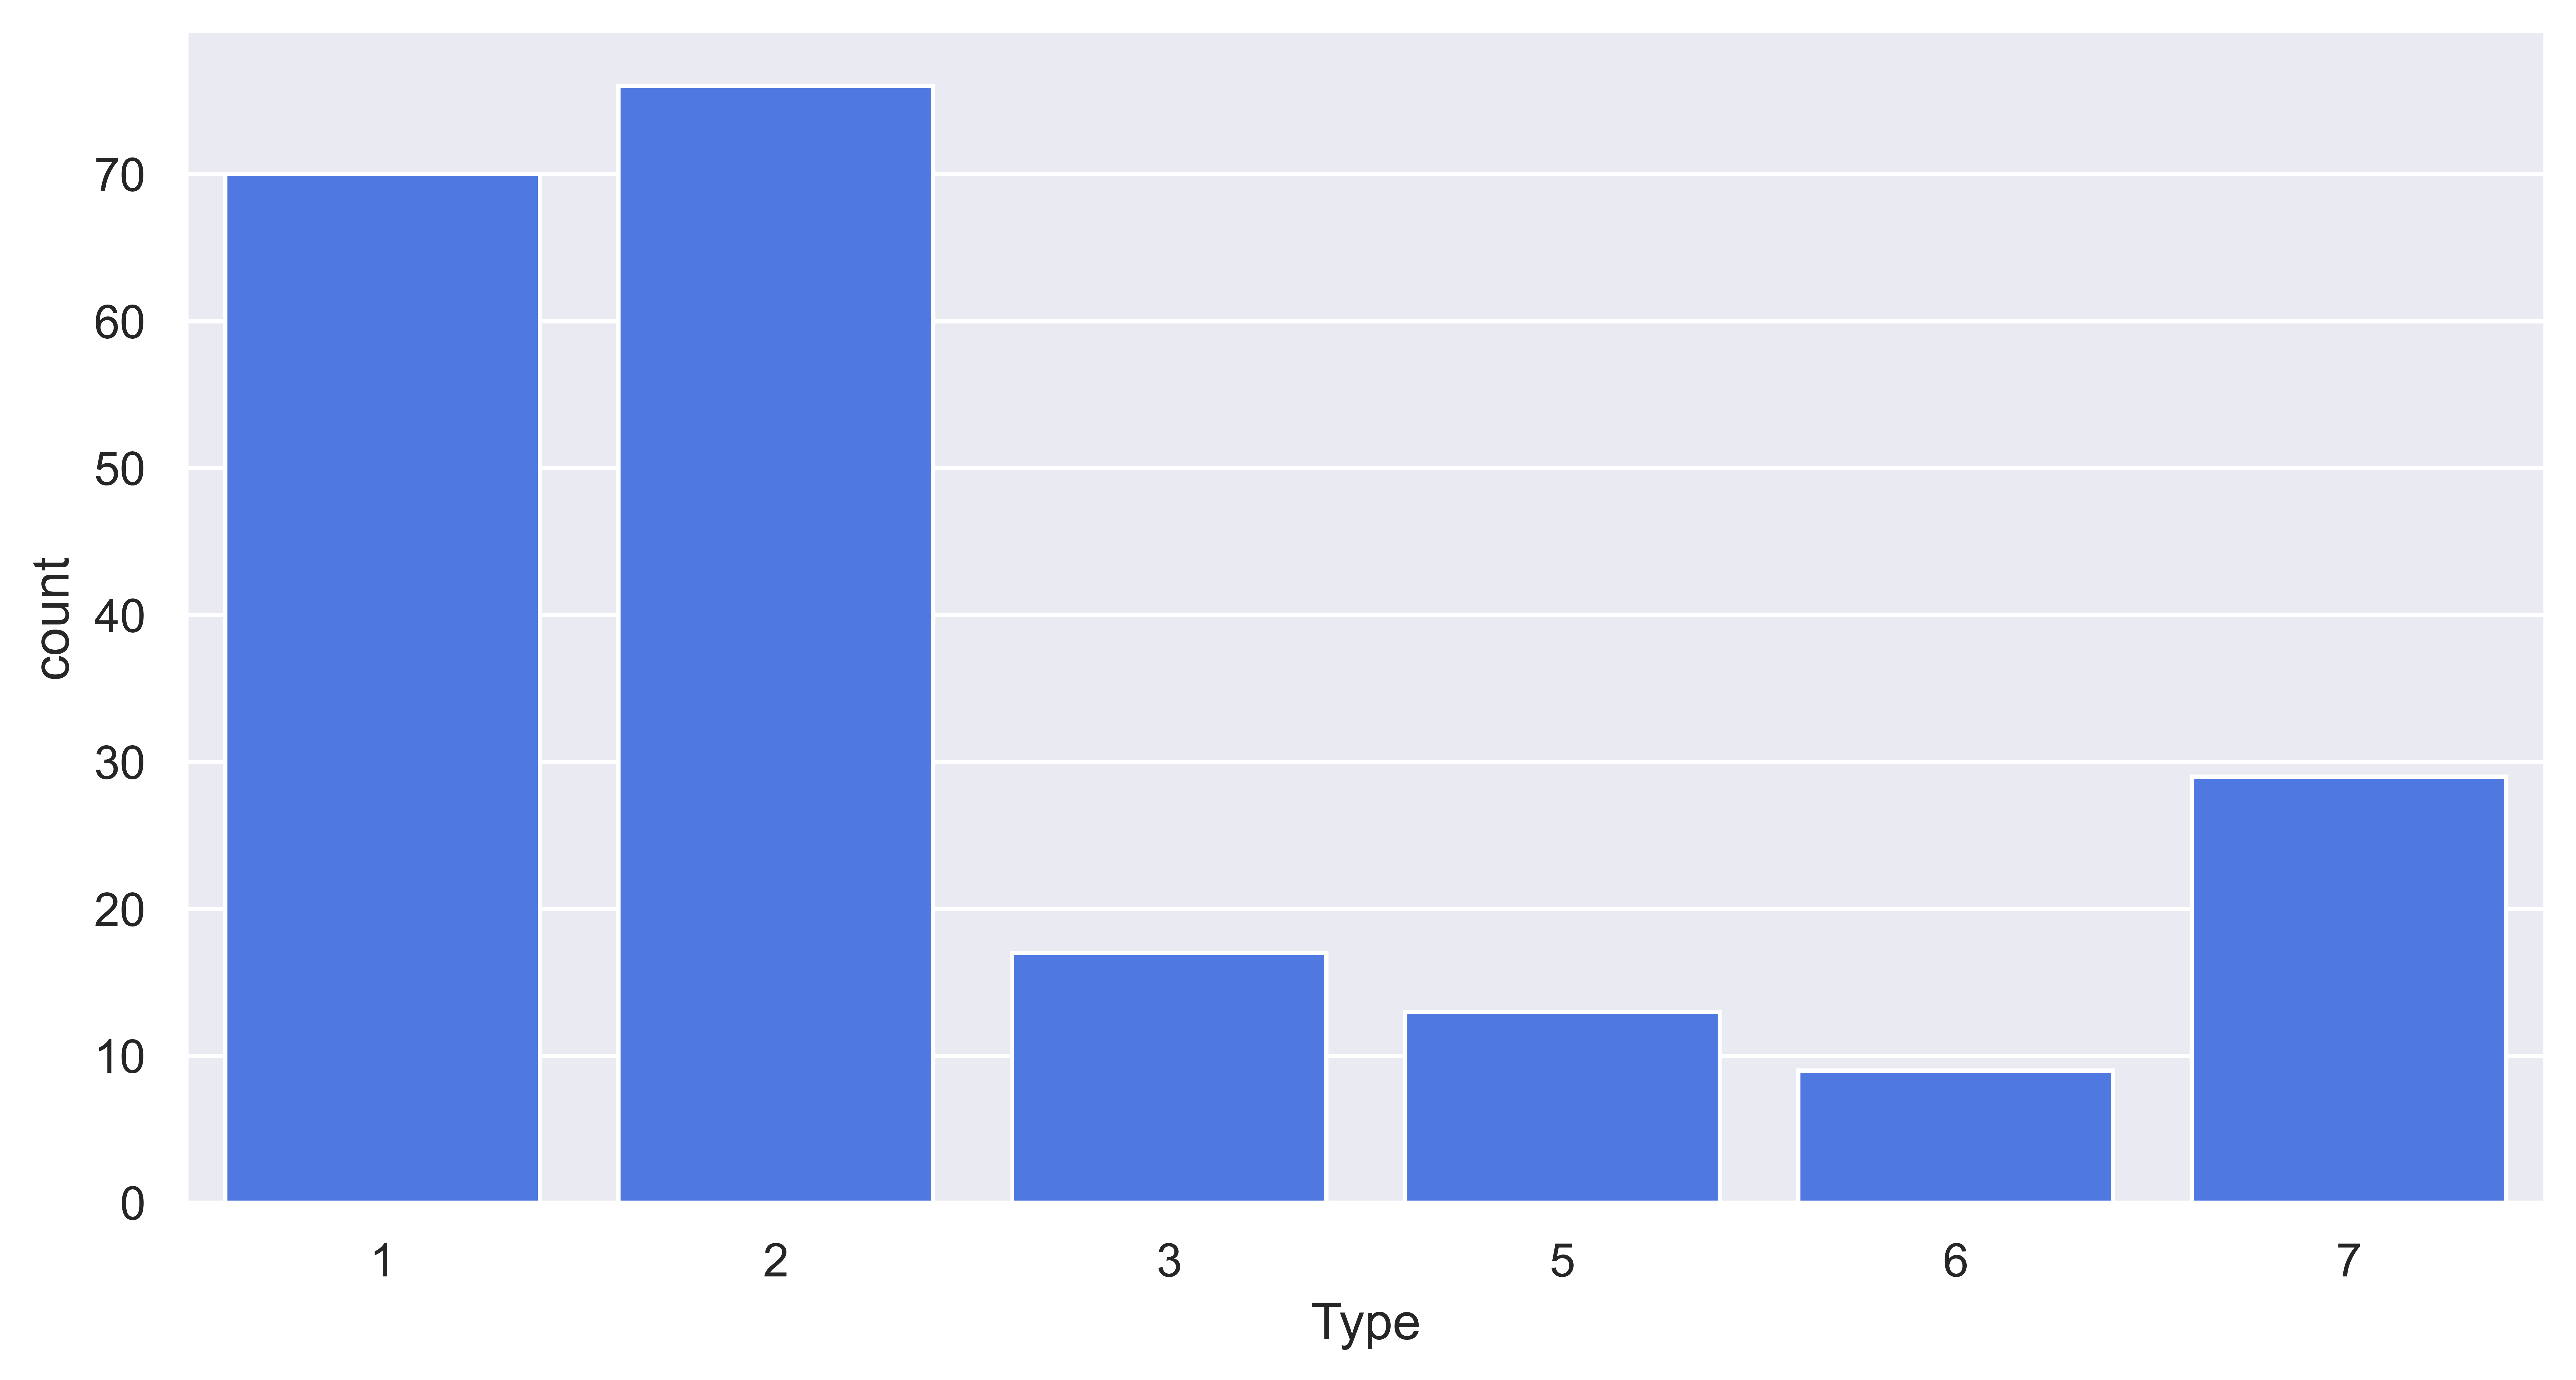

In [6]:
sns.countplot(x = df['Type']) 

In [7]:
df['Type'].replace([1,2,3,5,6,7],['a','b','c','d','e','f'], inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,a
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,a
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,a
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,a
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,a
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,f
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,f
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,f
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,f


In [8]:
x = df.iloc[:,:-1]                                                              #compulsory steps for any supervised algorithm
y = df['Type']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1) 

In [10]:
rfc = RandomForestClassifier(random_state=10)                                     #compulsory steps for any supervised 
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
yp

array(['e', 'f', 'f', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b',
       'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'f', 'b', 'a', 'b', 'c',
       'b', 'b', 'b', 'a', 'd', 'e', 'a', 'a', 'a', 'a', 'b', 'c', 'b',
       'b', 'a', 'f', 'f'], dtype=object)

In [11]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

In [12]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [13]:
prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7906976744186046
              precision    recall  f1-score   support

           a       0.81      0.89      0.85        19
           b       0.77      0.83      0.80        12
           c       0.50      0.17      0.25         6
           d       1.00      1.00      1.00         1
           e       0.50      1.00      0.67         1
           f       1.00      1.00      1.00         4

    accuracy                           0.79        43
   macro avg       0.76      0.82      0.76        43
weighted avg       0.77      0.79      0.77        43



In [14]:
prediction(GradientBoostingClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7906976744186046
              precision    recall  f1-score   support

           a       0.75      0.79      0.77        19
           b       1.00      0.92      0.96        12
           c       0.40      0.33      0.36         6
           d       0.50      1.00      0.67         1
           e       1.00      1.00      1.00         1
           f       1.00      1.00      1.00         4

    accuracy                           0.79        43
   macro avg       0.78      0.84      0.79        43
weighted avg       0.79      0.79      0.79        43



In [15]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1165313289),
 DecisionTreeClassifier(max_features='sqrt', random_state=1283169405),
 DecisionTreeClassifier(max_features='sqrt', random_state=89128932),
 DecisionTreeClassifier(max_features='sqrt', random_state=2124247567),
 DecisionTreeClassifier(max_features='sqrt', random_state=574014784),
 DecisionTreeClassifier(max_features='sqrt', random_state=1902734705),
 DecisionTreeClassifier(max_features='sqrt', random_state=1068604539),
 DecisionTreeClassifier(max_features='sqrt', random_state=1425548444),
 DecisionTreeClassifier(max_features='sqrt', random_state=2141071321),
 DecisionTreeClassifier(max_features='sqrt', random_state=357864157),
 DecisionTreeClassifier(max_features='sqrt', random_state=965494256),
 DecisionTreeClassifier(max_features='sqrt', random_state=108111773),
 DecisionTreeClassifier(max_features='sqrt', random_state=850673521),
 DecisionTreeClassifier(max_features='sqrt', random_state=898541562),
 DecisionTreeC

In [16]:
len(rfc.estimators_)

100

In [17]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1165313289)

In [18]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           a       0.80      0.84      0.82        19
           b       0.69      0.75      0.72        12
           c       0.50      0.17      0.25         6
           d       1.00      1.00      1.00         1
           e       0.50      1.00      0.67         1
           f       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.72        43
weighted avg       0.73      0.74      0.72        43



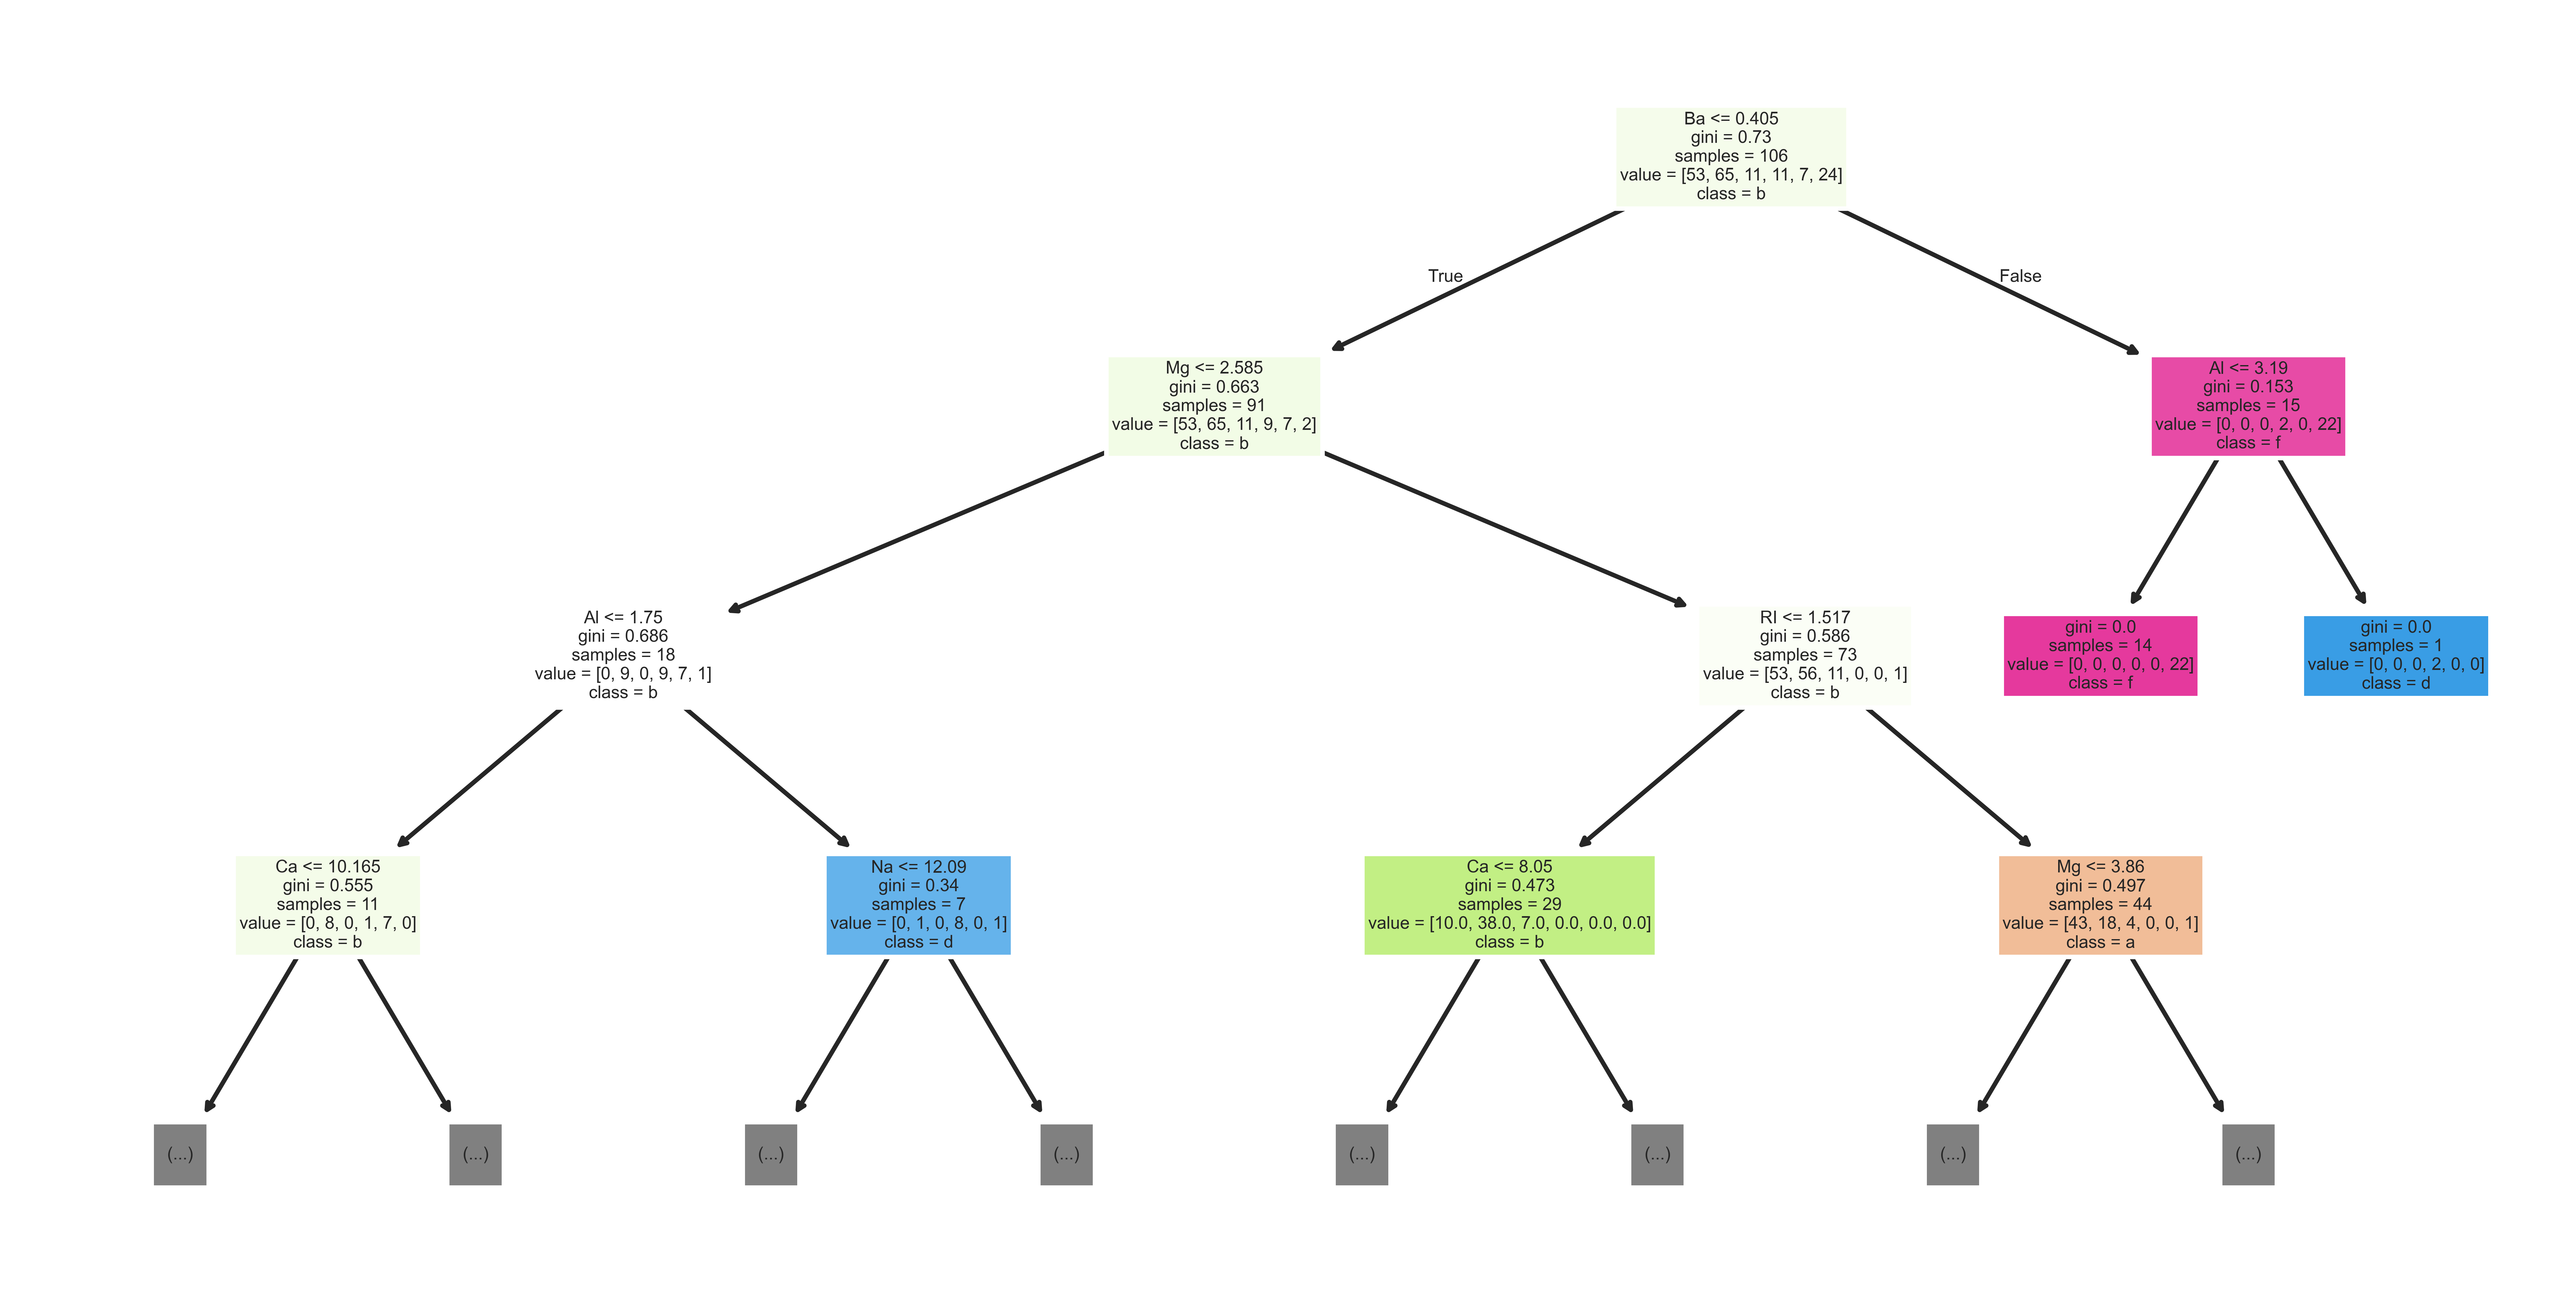

In [19]:
tree.plot_tree(rfc.estimators_[70], feature_names = x.columns, filled = True, class_names = df['Type'].unique(), max_depth = 3)
plt.show()

# Interview Questions

##### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging:It is a homogeneous weak learners’ model that learns from each other independently in parallel and it focuses on reducing variance by training models in parallel on different data subsets and combining their predictions.
Example: Random Forest.

Boosting:It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.
Example: AdaBoost, Gradient Boosting.

Bagging builds models independently and focuses on reducing overfitting by averaging their predictions and Boosting builds models sequentially, focusing on correcting errors to improve overall accuracy.

##### 2. Explain how to handle imbalance in the data.

Evaluation Metric Adjustment and Use ensemble learning techniques that handle imbalances well i.e. Random Forest with class weights and Boosting algorithms like XGBoost have built-in options to handle imbalanced data by adjusting the loss function or sample weights.